In [1]:
# Custom functions
import FPL_data
import FPL_ml

# Data manipulation
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
from IPython.display import HTML

# SKlearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

Use our custom function to load the data from disk

In [2]:
week_number, plyr_df, team_df, next_game_df, history_df = FPL_data.load_FPL_data(38)

In [3]:
history_df.columns

Index(['assists', 'attempted_passes', 'big_chances_created',
       'big_chances_missed', 'bonus', 'bps', 'clean_sheets',
       'clearances_blocks_interceptions', 'completed_passes', 'creativity',
       'dribbles', 'ea_index', 'element', 'errors_leading_to_goal',
       'errors_leading_to_goal_attempt', 'fixture', 'fouls', 'goals_conceded',
       'goals_scored', 'ict_index', 'id', 'influence', 'key_passes',
       'kickoff_time', 'kickoff_time_formatted', 'loaned_in', 'loaned_out',
       'minutes', 'offside', 'open_play_crosses', 'opponent_team', 'own_goals',
       'penalties_conceded', 'penalties_missed', 'penalties_saved',
       'recoveries', 'red_cards', 'round', 'saves', 'selected', 'tackled',
       'tackles', 'target_missed', 'team_a_score', 'team_h_score', 'threat',
       'total_points', 'transfers_balance', 'transfers_in', 'transfers_out',
       'value', 'was_home', 'winning_goals', 'yellow_cards', 'player_id'],
      dtype='object')

Let's try predicting gameweek 10, but training on data from weeks 1-8, then using 9 to predict

In [4]:
predict_week = 10

X_train = FPL_ml.data_prep(1,history_df,team_df,plyr_df)
print(X_train.shape[0])
for i in range(2,predict_week):
    X_train = X_train.append(FPL_ml.data_prep(i,history_df,team_df,plyr_df))
    print(X_train.shape[0])

434
870
1319
1781
2245
2711
3180
3652
4126


In [5]:
X_train.columns

Index(['assists', 'attempted_passes', 'big_chances_created',
       'big_chances_missed', 'bonus', 'bps', 'clean_sheets',
       'clearances_blocks_interceptions', 'completed_passes', 'creativity',
       'dribbles', 'ea_index', 'element', 'errors_leading_to_goal',
       'errors_leading_to_goal_attempt', 'fixture', 'fouls', 'goals_conceded',
       'goals_scored', 'ict_index', 'id_x', 'influence', 'key_passes',
       'loaned_in', 'loaned_out', 'minutes', 'offside', 'open_play_crosses',
       'opponent_team', 'own_goals', 'penalties_conceded', 'penalties_missed',
       'penalties_saved', 'recoveries', 'red_cards', 'round', 'saves',
       'selected', 'tackled', 'tackles', 'target_missed', 'team_a_score',
       'team_h_score', 'threat', 'total_points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'winning_goals',
       'yellow_cards', 'player_id', 'total_points_next_week', 'id_y',
       'squad_number', 'team', 'element_type', 'id', 'strength',


In [6]:
X_train.describe()

,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,...,strength_overall_home,opponent_team_next_week,id_next_week,strength_next_week,strength_attack_away_next_week,strength_attack_home_next_week,strength_defence_away_next_week,strength_defence_home_next_week,strength_overall_away_next_week,strength_overall_home_next_week
count,4126.000000,4126.000000,4126.000000,4126.000000,4126.000000,4126.000000,4126.000000,4126.000000,4126.000000,4126.000000,...,4126.000000,4126.000000,4126.000000,4126.000000,4126.000000,4126.000000,4126.000000,4126.000000,4126.000000,4126.000000
mean,0.049685,19.209404,0.051866,0.039263,0.138148,8.222734,0.168202,1.753272,15.239699,6.336476,...,1135.588948,10.525691,10.525691,3.151963,1168.683955,1126.563257,1161.141541,1126.173049,1170.126030,1136.643238
std,0.239603,23.443389,0.246626,0.213280,0.553393,10.920365,0.374091,3.055877,20.090462,12.080375,...,114.117344,5.754424,5.754424,1.014288,92.747103,100.946631,107.826711,114.042493,107.323283,114.051779
min,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,...,1020.000000,1.000000,1.000000,2.000000,1050.000000,1030.000000,1030.000000,1000.000000,1030.000000,1020.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1030.000000,6.000000,6.000000,2.000000,1080.000000,1040.000000,1070.000000,1020.000000,1090.000000,1040.000000
50%,0.000000,10.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,7.000000,0.200000,...,1090.000000,11.000000,11.000000,3.000000,1140.000000,1080.000000,1120.000000,1065.000000,1140.000000,1090.000000
75%,0.000000,32.000000,0.000000,0.000000,0.000000,14.000000,0.000000,2.000000,24.000000,8.300000,...,1230.000000,15.000000,15.000000,4.000000,1270.000000,1250.000000,1300.000000,1260.000000,1320.000000,1250.000000
max,2.000000,130.000000,3.000000,3.000000,3.000000,96.000000,1.000000,23.000000,120.000000,95.200000,...,1340.000000,20.000000,20.000000,5.000000,1320.000000,1300.000000,1340.000000,1320.000000,1350.000000,1340.000000


Check for columns with NULLs

In [7]:
X_train.columns[X_train.isnull().any()]

Index([], dtype='object')

In [8]:
HTML(X_train[X_train['opponent_team_next_week'].isnull()].to_html())

,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,ea_index,element,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,id_x,influence,key_passes,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards,player_id,total_points_next_week,id_y,squad_number,team,element_type,id,strength,strength_attack_away,strength_attack_home,strength_defence_away,strength_defence_home,strength_overall_away,strength_overall_home,opponent_team_next_week,id_next_week,strength_next_week,strength_attack_away_next_week,strength_attack_home_next_week,strength_defence_away_next_week,strength_defence_home_next_week,strength_overall_away_next_week,strength_overall_home_next_week


In [9]:
y_train = X_train.pop('total_points_next_week')

# Build model

In [10]:
model = RandomForestRegressor(random_state=42)
model = model.fit(X_train,y_train)

In [11]:
X = FPL_ml.data_prep(predict_week,history_df,team_df,plyr_df)
y = X.pop('total_points_next_week')
y_predict = model.predict(X)
print('Mean squared error: {0}'.format(mean_squared_error(y,y_predict)))

Mean squared error: 6.323130252100841


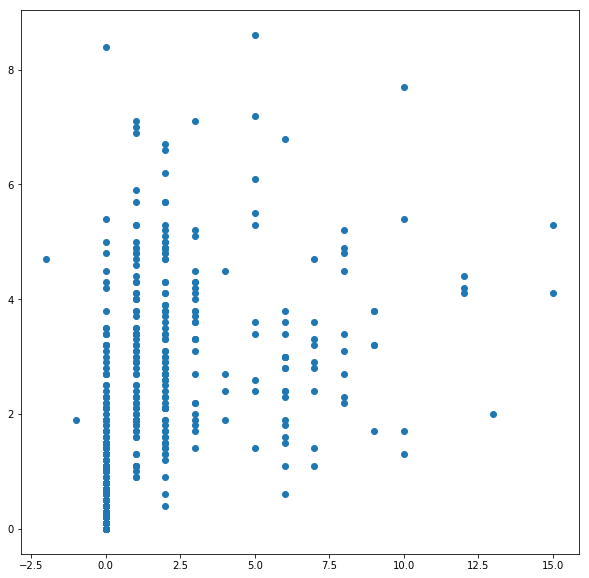

In [12]:
plt.scatter(y,y_predict);

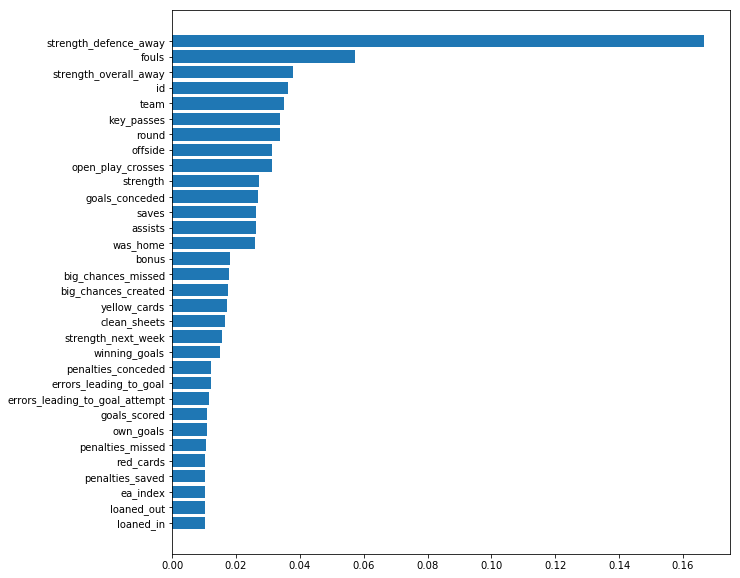

In [13]:
FPL_ml.plot_feature_importance(X,model)

In [14]:
from sklearn.preprocessing import OneHotEncoder
# Team should be one-hot encoded for best results
enc = OneHotEncoder()
enc.fit(X['opponent_team'].values.reshape(-1,1))
    

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [15]:
enc.n_values_

array([21])

In [16]:
enc.feature_indices_

array([ 0, 21], dtype=int32)

In [17]:
X_teams = enc.transform(X['opponent_team'].values.reshape(-1,1)).toarray()

In [18]:
X_teams

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
team_df.columns

Index(['code', 'current_event_fixture', 'draw', 'form', 'id', 'link_url',
       'loss', 'name', 'next_event_fixture', 'played', 'points', 'position',
       'short_name', 'strength', 'strength_attack_away',
       'strength_attack_home', 'strength_defence_away',
       'strength_defence_home', 'strength_overall_away',
       'strength_overall_home', 'team_division', 'unavailable', 'win'],
      dtype='object')

In [20]:
team_df

,code,current_event_fixture,draw,form,id,link_url,loss,name,next_event_fixture,played,...,strength,strength_attack_away,strength_attack_home,strength_defence_away,strength_defence_home,strength_overall_away,strength_overall_home,team_division,unavailable,win
0,3,"[{'is_home': True, 'day': 6, 'event_day': 3, '...",0,None,1,,0,Arsenal,"[{'is_home': False, 'day': 13, 'event_day': 1,...",0,...,4,1260,1200,1320,1260,1320,1230,1,False,0
1,91,"[{'is_home': True, 'day': 5, 'event_day': 2, '...",0,None,2,,0,Bournemouth,"[{'is_home': False, 'day': 13, 'event_day': 1,...",0,...,3,1070,1060,1120,1110,1140,1110,1,False,0
2,36,"[{'is_home': True, 'day': 4, 'event_day': 1, '...",0,None,3,,0,Brighton,"[{'is_home': False, 'day': 13, 'event_day': 1,...",0,...,2,1070,1060,1100,1020,1090,1030,1,False,0
3,90,"[{'is_home': False, 'day': 6, 'event_day': 3, ...",0,None,4,,0,Burnley,"[{'is_home': True, 'day': 13, 'event_day': 1, ...",0,...,3,1180,1170,1050,1050,1130,1130,1,False,0
4,8,"[{'is_home': True, 'day': 6, 'event_day': 3, '...",0,None,5,,0,Chelsea,"[{'is_home': False, 'day': 13, 'event_day': 1,...",0,...,4,1270,1250,1300,1280,1290,1250,1,False,0
5,31,"[{'is_home': False, 'day': 5, 'event_day': 2, ...",0,None,6,,0,Crystal Palace,"[{'is_home': True, 'day': 13, 'event_day': 1, ...",0,...,3,1100,1070,1080,1070,1100,1090,1,False,0
6,11,"[{'is_home': True, 'day': 5, 'event_day': 2, '...",0,None,7,,0,Everton,"[{'is_home': False, 'day': 13, 'event_day': 1,...",0,...,3,1170,1050,1140,1050,1150,1060,1,False,0
7,38,"[{'is_home': False, 'day': 6, 'event_day': 3, ...",0,None,8,,0,Huddersfield,"[{'is_home': True, 'day': 13, 'event_day': 1, ...",0,...,2,1050,1040,1030,1000,1050,1020,1,False,0
8,13,"[{'is_home': True, 'day': 5, 'event_day': 2, '...",0,None,9,,0,Leicester,"[{'is_home': False, 'day': 13, 'event_day': 1,...",0,...,3,1200,1110,1170,1160,1180,1140,1,False,0
9,14,"[{'is_home': False, 'day': 6, 'event_day': 3, ...",0,None,10,,0,Liverpool,"[{'is_home': True, 'day': 13, 'event_day': 1, ...",0,...,5,1290,1280,1320,1300,1330,1330,1,False,0


In [21]:
next_game_df

,code,deadline_time,deadline_time_formatted,event,event_day,finished,finished_provisional,id,kickoff_time,kickoff_time_formatted,minutes,provisional_start_time,started,stats,team_a,team_a_score,team_h,team_h_score
0,919263,2018-05-13T13:00:00Z,13 May 14:00,38,1,False,False,371,2018-05-13T14:00:00Z,13 May 15:00,0,False,False,[],2,None,4,None
1,919264,2018-05-13T13:00:00Z,13 May 14:00,38,1,False,False,372,2018-05-13T14:00:00Z,13 May 15:00,0,False,False,[],19,None,6,None
2,919265,2018-05-13T13:00:00Z,13 May 14:00,38,1,False,False,373,2018-05-13T14:00:00Z,13 May 15:00,0,False,False,[],1,None,8,None
3,919266,2018-05-13T13:00:00Z,13 May 14:00,38,1,False,False,374,2018-05-13T14:00:00Z,13 May 15:00,0,False,False,[],3,None,10,None
4,919267,2018-05-13T13:00:00Z,13 May 14:00,38,1,False,False,375,2018-05-13T14:00:00Z,13 May 15:00,0,False,False,[],18,None,12,None
5,919268,2018-05-13T13:00:00Z,13 May 14:00,38,1,False,False,376,2018-05-13T14:00:00Z,13 May 15:00,0,False,False,[],5,None,13,None
6,919269,2018-05-13T13:00:00Z,13 May 14:00,38,1,False,False,377,2018-05-13T14:00:00Z,13 May 15:00,0,False,False,[],11,None,14,None
7,919271,2018-05-13T13:00:00Z,13 May 14:00,38,1,False,False,379,2018-05-13T14:00:00Z,13 May 15:00,0,False,False,[],9,None,17,None
8,919270,2018-05-13T13:00:00Z,13 May 14:00,38,1,False,False,378,2018-05-13T14:00:00Z,13 May 15:00,0,False,False,[],15,None,16,None
9,919272,2018-05-13T13:00:00Z,13 May 14:00,38,1,False,False,380,2018-05-13T14:00:00Z,13 May 15:00,0,False,False,[],7,None,20,None


In [22]:
plyr_df[['team','team_code','id','first_name','second_name']]

,team,team_code,id,first_name,second_name
0,1,3,1,David,Ospina
1,1,3,2,Petr,Cech
2,1,3,3,Damian Emiliano,Martinez
3,1,3,4,Laurent,Koscielny
4,1,3,5,Per,Mertesacker
5,1,3,6,Gabriel Armando,de Abreu
6,1,3,7,Héctor,Bellerín
7,1,3,9,Carl,Jenkinson
8,1,3,10,Nacho,Monreal
9,1,3,11,Rob,Holding


In [23]:
plyr_df.columns

Index(['assists', 'bonus', 'bps', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'clean_sheets', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'creativity', 'dreamteam_count', 'ea_index',
       'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name',
       'form', 'goals_conceded', 'goals_scored', 'ict_index', 'id',
       'in_dreamteam', 'influence', 'loaned_in', 'loaned_out', 'loans_in',
       'loans_out', 'minutes', 'news', 'news_added', 'now_cost', 'own_goals',
       'penalties_missed', 'penalties_saved', 'photo', 'points_per_game',
       'red_cards', 'saves', 'second_name', 'selected_by_percent', 'special',
       'squad_number', 'status', 'team', 'team_code', 'threat', 'total_points',
       'transfers_in', 'transfers_in_event', 'transfers_out',
       'transfers_out_event', 'value_form', 'value_season', 'web_name',
       'yellow_cards'],
      dtype='object')

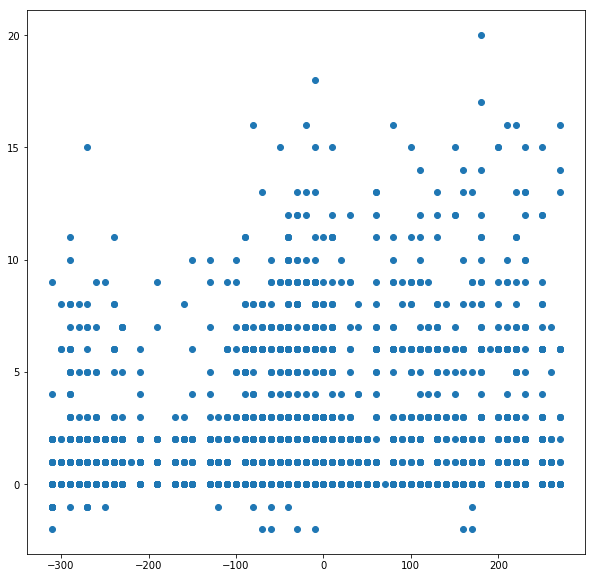

In [24]:
plt.scatter(X_train['strength_attack_home']-X_train['strength_defence_away_next_week'], y_train);

In [25]:
X_train.columns

Index(['assists', 'attempted_passes', 'big_chances_created',
       'big_chances_missed', 'bonus', 'bps', 'clean_sheets',
       'clearances_blocks_interceptions', 'completed_passes', 'creativity',
       'dribbles', 'ea_index', 'element', 'errors_leading_to_goal',
       'errors_leading_to_goal_attempt', 'fixture', 'fouls', 'goals_conceded',
       'goals_scored', 'ict_index', 'id_x', 'influence', 'key_passes',
       'loaned_in', 'loaned_out', 'minutes', 'offside', 'open_play_crosses',
       'opponent_team', 'own_goals', 'penalties_conceded', 'penalties_missed',
       'penalties_saved', 'recoveries', 'red_cards', 'round', 'saves',
       'selected', 'tackled', 'tackles', 'target_missed', 'team_a_score',
       'team_h_score', 'threat', 'total_points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'winning_goals',
       'yellow_cards', 'player_id', 'id_y', 'squad_number', 'team',
       'element_type', 'id', 'strength', 'strength_attack_away',
  

In [26]:
X_train['opponent_team']

0       9
1       9
2       9
3       9
4       9
5       9
6       9
7       9
8       9
9       9
10      9
11      9
12      9
13      9
14      9
15      9
16      9
17      9
18     20
19      9
20      9
21     19
22     19
23     19
24     19
25     19
26     19
27     19
28     19
29     19
       ..
444    14
445    14
446    14
447    14
448    14
449    14
450    14
451    14
452    14
453    14
454     3
455     3
456     3
457     3
458     3
459     3
460     3
461     3
462     3
463     3
464     3
465     3
466     3
467     3
468     3
469     3
470     3
471     3
472     3
473     3
Name: opponent_team, dtype: int64